In [1]:
%run ./Functions/TupleToPolynom.ipynb
%run ./Functions/AddPolynoms.ipynb
%run ./Functions/PolynomDivision.ipynb
%run ./Functions/MinimalPolynoms.ipynb
%run ./Functions/MultiplyPolynoms.ipynb
%run ./Functions/Euclid.ipynb
%run ./Functions/AlternativeMultiplication.ipynb
%run ./Functions/AuxiliaryFunctions.ipynb
%run ./Functions/CantorZassenhaus.ipynb

In [2]:
import time as t
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Liste an Minimalpolynomen
MinimalPolynoms = [
    (1,0,1,1),                         # Grad 3
    (1,0,0,1,1),
    (1,0,0,1,0,1),
    (1,0,0,0,0,1,1),
    (1,0,0,0,0,0,1,1),
    (1,0,0,0,1,1,0,1,1),
    (1,0,0,0,0,1,0,0,0,1),
    (1,0,0,0,0,0,0,1,0,0,1),
    (1,0,0,0,0,0,0,0,0,1,0,1),
    (1,0,0,0,0,0,1,0,1,0,0,1,1),
    (1,0,0,0,0,0,1,0,0,0,1,0,1,1),     
    (1,0,0,0,0,0,0,0,0,1,0,1,0,1,1),   
    (1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1), # Grad 15
]

In [4]:
# Grad des Minimalpolynoms bestimmen (von 3 bis 15, ab Grad 10 dauerts länger)
degree = 8
M = MinimalPolynoms[degree-3]
print(f"Minimalpolynom: M = {tuple_to_polynom(M)}")

# Check, ob M ein Minimalpolynom ist
print(f"M ist ein Minimalpolynom: {is_minpol(M)}")

# bestimme die Länge n, die die Tupel anhand M maximal haben dürfen (müssen 1 kürzer als M sein)
n = len(M) - 1

# Liste von allen möglichen Tupeln, der Lönge n, erstellen  
List_of_all_tupels = list(product([0, 1], repeat=n))

Minimalpolynom: M = (X^8 + X^4 + X^3 + X + 1)
M ist ein Minimalpolynom: True


In [5]:
# Methodischer Test, ob beide Multiplikationen für alle möglichen Tupelkombinationen, die in einer Relation existieren, übereinstimmen
    
# Fehler- und Korrekt-Counter, die erhöht werden sollten die Ergebnisser der beiden Multiplikationen übereinstimmen (oder nicht)
correct_counter, mistake_counter = 0, 0

# Ausgabe in welchem Körper die Ergebnisse verglichen werden
print(f"Ergebnisse der beiden Multiplikations-Algortihmen vergleichen im Körper F_2^{find_degree(M)}")

# Alle Tupel-Kombinationen untereinender multiplizieren (mit beiden Varianten), dann Ergebnisse der beiden Varianten vergleichen
for F in List_of_all_tupels: 
    for G in List_of_all_tupels:

        # Berechne die Ergebnisse der beiden Varianten
        A = reduce_product(multiply_polynoms(F, G), M)
        B = alternative_multiplication(F, G, M) 

        # Wenn die Ergebnisse  gleich sind, erhöhe den Correct-Counter 
        if cut_zeros_left(A) == cut_zeros_left(B):
            correct_counter = correct_counter + 1

        # Wenn die Ergebnisse gleich sind, erhöhe den Fehler-Counter
        else:
            mistake_counter = mistake_counter + 1

# Ausgabe der Counter
print(f"Falsch: {mistake_counter}")
print(f"Korrekt: {correct_counter}")

Ergebnisse der beiden Multiplikations-Algortihmen vergleichen im Körper F_2^8
Falsch: 0
Korrekt: 65536


In [6]:
# Mutliplikation aller Tupelkombinationen für die erste Variante (MultiplyPolynoms)

# Startzeitpunkt
start1 = t.time()

# Iteration über alle Tupel-Multiplikationen
for F in List_of_all_tupels: 
    for G in List_of_all_tupels:
        result1 = reduce_product(multiply_polynoms(F, G), M)

# Endzeitpunkt
end1 = t.time()

In [7]:
# Mutliplikation aller Tupelkombinationen für die zweite Variante (AlternativeMultiplication)

# Startzeitpunkt
start2 = t.time()

# Iteration über alle Tupel-Multiplikationen
for F in List_of_all_tupels: 
    for G in List_of_all_tupels:
        result2 = alternative_multiplication(F, G, M)

# Endzeitpunkt
end2 = t.time()

In [8]:
# Differenz der Zeitpunkte bilden und ausgeben (auf 5 Nachkommastellen)
print(f"MultiplyPolynoms:          {(end1 - start1):.5f} Sekunden")
print(f"AlternativeMultiplication: {(end2 - start2):.5f} Sekunden")

MultiplyPolynoms:          1.31954 Sekunden
AlternativeMultiplication: 2.50679 Sekunden


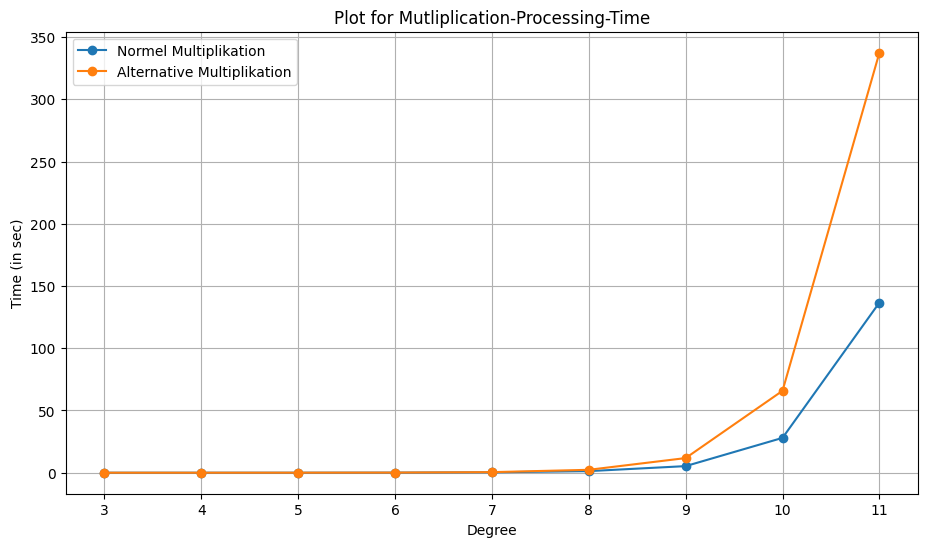

In [9]:
# Visualisierung der Zeitunterschiede der beiden Multiplikationen

# Messdaten
TimeNormal =      [0.000, 0.004, 0.014, 0.072, 0.319, 1.287,  5.304, 27.992, 136.667]
TimeAlternative = [0.001, 0.004, 0.029, 0.107, 0.465, 2.336, 11.763, 65.808, 337.391]
Grad = np.arange(3, len(TimeNormal) + 3)

# Plot erstellen
plt.figure(figsize=(11, 6))
plt.plot(Grad, TimeNormal, marker='o', linestyle='-', label="Normel Multiplikation")
plt.plot(Grad, TimeAlternative, marker='o', linestyle='-', label="Alternative Multiplikation")
plt.title("Plot for Mutliplication-Processing-Time")
plt.xlabel("Degree")
plt.xticks(Grad)
plt.ylabel("Time (in sec)")
plt.legend()
plt.grid(True)

plt.show()